In [2]:
import markov_decision as md
import read_map as rm
import utilASP as ua


map_arr = rm.map_read('maps/corridor.png')

room_list, doors = rm.find_rooms_and_doors(map_arr)

rooms = rm.create_room_arr(room_list,doors,map_arr)

asp_rooms = rm.create_asp(rooms)



asp_doc = ua.read_file_sp_to_list('grid_move_template.sp')

constants_list, sorts_list, predicates_list, rules_list, display_list = ua.split_asp_sections(asp_doc)

rules_list = ua.add_rules(rules_list,asp_rooms)

start_room = 0
start_point = [10,10]
goal_point = [10,140]
init_goal = 2
rules_list = ua.add_rules(rules_list,[f'holds(at(r,x{start_room}),0).','goal(I) :- holds(at(r,x2),I).'])

if start_room != init_goal:
    new_asp_doc = ua.add_sections_together(constants_list, sorts_list, predicates_list, rules_list, display_list)

    ua.write_list_to_file('first_test.sp',new_asp_doc)

    min_route = ua.find_minimal_answersets('first_test.sp','temp.sp')

    asp_route = [start_room]
    for item in min_route[0]:
        asp_route.append(int(item[15]))
else:
    asp_route = start_room


route = []
for it in range(0,len(asp_route)):
    if asp_route[it] == asp_route[0] and len(asp_route) != 1:
        if len(rooms[asp_route[it]].goals) == 1:
            loc_route = md.choose_route_look_ahead(rooms[asp_route[it]].roombox,rooms[asp_route[it]].markov_plans[0][0],rooms[asp_route[it]].start_point_calc(start_point),[rooms[asp_route[it]].goals[0][0]])
            global_route = []
            for loc_point in loc_route:
                global_route.append(rooms[asp_route[it]].convert_route_global(loc_point))
            route = route + global_route
    elif len(asp_route)==1:
        plan_same = md.markov_reward(rooms[asp_route[it]].roombox,rooms[asp_route[it]].reward_dict,1, goal_point, previous_values = 'empty',extra_val = -1000)
        for plan_iter in range(0,100):
            plan_same = md.markov_reward(rooms[asp_route[it]].roombox,rooms[asp_route[it]].reward_dict,1, goal_point, previous_values = plan_same,extra_val = -1000)
        loc_route = md.choose_route_look_ahead(rooms[asp_route[it]].roombox,plan_same,start_point,[goal_point])
        global_route = []
        for loc_point in loc_route:
            global_route.append(rooms[asp_route[it]].convert_route_global(loc_point))
        route = route + global_route

    elif it == len(asp_route)-1:
        prev_room = rooms[asp_route[it]-1].room
        for connect_room in rooms[asp_route[it]].connections:
            if prev_room == connect_room[0]:
                prev_door = connect_room[1]
        for loc_door in rooms[asp_route[it]].local_doors:
            if loc_door[2] == prev_door:
                for it_goal in rooms[asp_route[it]].goals:
                    if it_goal[1] == loc_door[2]:
                        next_start = it_goal[0]

        loc_route = md.choose_route_look_ahead(rooms[asp_route[it]].roombox,rooms[asp_route[it]].markov_plans[asp_route[it+1]][0],next_start,[goal_point])
        global_route = []
        for loc_point in loc_route:
            global_route.append(rooms[asp_route[it]].convert_route_global(loc_point))
        route = route + global_route

    else:
        prev_room = rooms[asp_route[it]-1].room
        next_room = rooms[asp_route[it]+1].room
        for connect_room in rooms[asp_route[it]].connections:
            if prev_room == connect_room[0]:
                prev_door = connect_room[1]
            if next_room == connect_room[0]:
                next_door = connect_room[1]
        for loc_door in rooms[asp_route[it]].local_doors:
            if loc_door[2] == prev_door:
                for it_goal in rooms[asp_route[it]].goals:
                    if it_goal[1] == loc_door[2]:
                        next_start = it_goal[0]
            if loc_door[2] == next_door:
                for it_goal in rooms[asp_route[it]].goals:
                    if it_goal[1] == loc_door[2]:
                        next_goal = it_goal[0]

        loc_route = md.choose_route_look_ahead(rooms[asp_route[it]].roombox,rooms[asp_route[it]].markov_plans[asp_route[it+1][0]],next_start,[next_goal])
        global_route = []
        for loc_point in loc_route:
            global_route.append(rooms[asp_route[it]].convert_route_global(loc_point))
        route = route + global_route



print(route)


bad path


IndexError: list index out of range

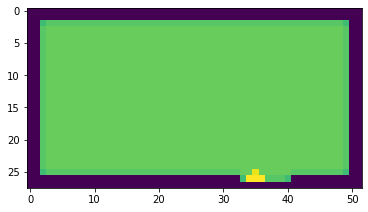

In [13]:
plt.imshow(rooms[0].markov_plans[0][0])

In [26]:
rooms[0].markov_plans[0][0][26][35]

290.0

In [27]:
rooms[0].goals[0]

[26, 35]